<a href="https://colab.research.google.com/github/ahammedshaneebnk/Data_Analysis_Exercises/blob/main/best_feature_selection_from_titanic_passengers_survival_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**To find out the best feature from the titanic passengers survival dataset for training:**

The original data can be found at: ”http://www.kaggle.com/c/titanic-gettingStarted”

==================== Basic Details of the Dataset ====================

Rows = 714
Columns = 7

Top 10 Rows of the Dataset:

   First_class  Sex  Age  SibSp  ParCh  Embarked  Survived
0            0    0    0      0      1         0         1
1            0    1    0      1      1         0         1
2            0    1    0      1      1         0         1
3            0    1    0      0      1         0         1
4            0    0    0      0      1         0         1
5            0    1    0      1      1         0         1
6            0    1    0      0      1         0         1
7            0    1    0      1      1         0         1
8            0    1    0      1      1         0         0
9            0    0    0      0      0         0         0

Features = ['First_class' 'Sex' 'Age' 'SibSp' 'ParCh' 'Embarked']

==================== Feature Name : 'First_class' ====================

bin0 has 528 rows in total
bin0: Top 10 Rows

   First_class  Sex  Age  SibSp  ParCh  

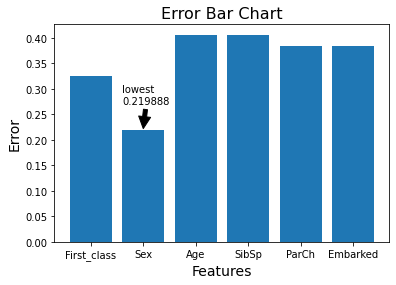


Lowest error is '0.219888' and corresponding feature is 'Sex'

Best Feature which can be used to train is 'Sex'


In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# reading the data
df = pd.read_csv('titanic-train.csv')

# basic details of the data
print(f"{20*'='} Basic Details of the Dataset {20*'='}\n")
# rows and columns of data
print(f"Rows = {df.shape[0]}")
print(f"Columns = {df.shape[1]}\n")

# top 10 rows of data
print("Top 10 Rows of the Dataset:\n")
print(df.head(10))

# feature names
features = np.array(df.columns[:-1])
print(f"\nFeatures = {features}\n")


# Function to find out the error when a particular feature is used
# receiving feature name as argument
# returning error for the feature


def find_error_per_feature(feature_name):

  # feature name as title
  print(f"{20*'='} Feature Name : '{feature_name}' {20*'='}")

  # assigning bin0 and bin1
  bin0 = df.loc[df[feature_name] == 0]
  bin1 = df.loc[df[feature_name] == 1]

  # bin0 details
  print(f"\nbin0 has {len(bin0)} rows in total")
  print("bin0: Top 10 Rows\n")
  print(bin0.head(10))

  # label count for bin0
  count_bin0_survive = bin0.loc[bin0[df.columns[-1]] == 1].shape[0]
  count_bin0_not_survive = bin0.loc[bin0[df.columns[-1]] == 0].shape[0]
  print(f"\nbin0 survived count = {count_bin0_survive}")
  print(f"bin0 not survived count = {count_bin0_not_survive}")

  # finding majority in case of bin0
  majority_bin0 = max(count_bin0_survive, count_bin0_not_survive)
  print(f"bin0 Majority = {majority_bin0}")

  # bin1 details
  print(f"\nbin1 has {len(bin1)} rows in total")
  print("bin1: Top 10 Rows\n")
  print(bin1.head(10))

  # label coount for bin1
  count_bin1_survive = bin1.loc[bin1[df.columns[-1]] == 1].shape[0]
  count_bin1_not_survive = bin1.loc[bin1[df.columns[-1]] == 0].shape[0]
  print(f"\nbin1 survived count = {count_bin1_survive}")
  print(f"bin1 not survived count = {count_bin1_not_survive}")

  # finding majority in case of bin1
  majority_bin1 = max(count_bin1_survive, count_bin1_not_survive)
  print(f"bin1 Majority = {majority_bin1}")

  # finding error
  error = 1 - (majority_bin0 + majority_bin1) / df.shape[0]
  print(f"\nError when Feature '{feature_name}' is used = {error}\n\n")
  return error


# initializing error array
errors = np.zeros(len(features))

# find the error per feature
for i in range(len(errors)):
  errors[i] = find_error_per_feature(features[i])

# displaying error per feature
print(f"{20*'='} Details of Error per Feature {20*'='}\n")
feature_error = {'Feature Name':features, 'Error':errors}
print(pd.DataFrame(feature_error))

# bar chart of errors
print('\n')
plt.bar(features, errors)
plt.annotate('lowest\n%.6f'%(errors[1]), xy = ('Sex', errors[1]), xytext = (.6, errors[1]+.05),
arrowprops = dict(facecolor = 'black', shrink = 0.05))
plt.xlabel('Features', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title('Error Bar Chart', fontsize=16)
plt.show()

# find minimum error and corresponding feature
print(f"\nLowest error is '{np.round(np.min(errors), 6)}' and corresponding feature is '{features[np.argmin(errors)]}'")
print(f"\nBest Feature which can be used to train is '{features[np.argmin(errors)]}'")

**Submitted By:**

> Ahammed Shaneeb N K

> M.Tech, Artificial Intelligence

> College of Engineering, Trivandrum, India